# Random Forest - Classification Model
***Hypothesis***: Predicting if home price is going to be drive up or down (high/low)?

#### Note - the house supply is the ratio of houses for sale to houses sold.

In [1]:
from sklearn import tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the csv file into a pandas DataFrame

housing_data = pd.read_csv('etl/housing_combined_data.csv')
housing_data_subset = housing_data.loc[(housing_data["date"] >= "1990-01-01")
                     & (housing_data["date"] < "2021-01-01")]
housing_data_subset

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,1990-01-01,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333
...,...,...,...,...,...,...,...,...,...,...,...
119,2019-10-01,3.70,1405.000000,327100.0,65.0,96.33,5.433333,1490.333333,206.27,1168.333333,1279.666667
120,2020-01-01,3.52,1485.000000,329000.0,65.3,101.60,5.566667,1470.000000,210.60,1209.000000,1283.000000
121,2020-04-01,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000
122,2020-07-01,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333


In [4]:
housing_data_subset = housing_data_subset.drop(["date"], axis=1)
housing_data_subset

,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333
...,...,...,...,...,...,...,...,...,...,...
119,3.70,1405.000000,327100.0,65.0,96.33,5.433333,1490.333333,206.27,1168.333333,1279.666667
120,3.52,1485.000000,329000.0,65.3,101.60,5.566667,1470.000000,210.60,1209.000000,1283.000000
121,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000
122,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333


In [5]:
# Find median interest_rate
median_int_rate = housing_data_subset["avg_home_price"].median()
median_int_rate

219250.0

In [6]:
# Average home price outcome column

# create a list of our conditions
conditions = [
    (housing_data_subset["avg_home_price"] >= 219250.0),
    (housing_data_subset["avg_home_price"] < 219250.0)
    ]

# create a list of the values we want to assign for each condition
outcomes = ["high", "low"]

# create a new column and use np.select to assign outcomes to it using our lists as arguments

housing_data_subset["avg_home_outcome"] = np.select(conditions, outcomes)
housing_data_subset

,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed,avg_home_outcome
0,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667,low
1,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333,low
2,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667,low
3,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333,low
4,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333,low
...,...,...,...,...,...,...,...,...,...,...,...
119,3.70,1405.000000,327100.0,65.0,96.33,5.433333,1490.333333,206.27,1168.333333,1279.666667,high
120,3.52,1485.000000,329000.0,65.3,101.60,5.566667,1470.000000,210.60,1209.000000,1283.000000,high
121,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000,high
122,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333,high


In [7]:
# Decision Tree
target = housing_data_subset["avg_home_outcome"]

In [8]:
data = housing_data_subset.drop(["avg_home_price","avg_home_outcome"], axis=1)
feature_names = data.columns
data.head()

,interest_rate,units_authorized_started,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,10.13,1425.666667,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,10.32,1212.333333,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,10.10,1132.000000,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,9.96,1042.666667,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,9.50,894.666667,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.967741935483871

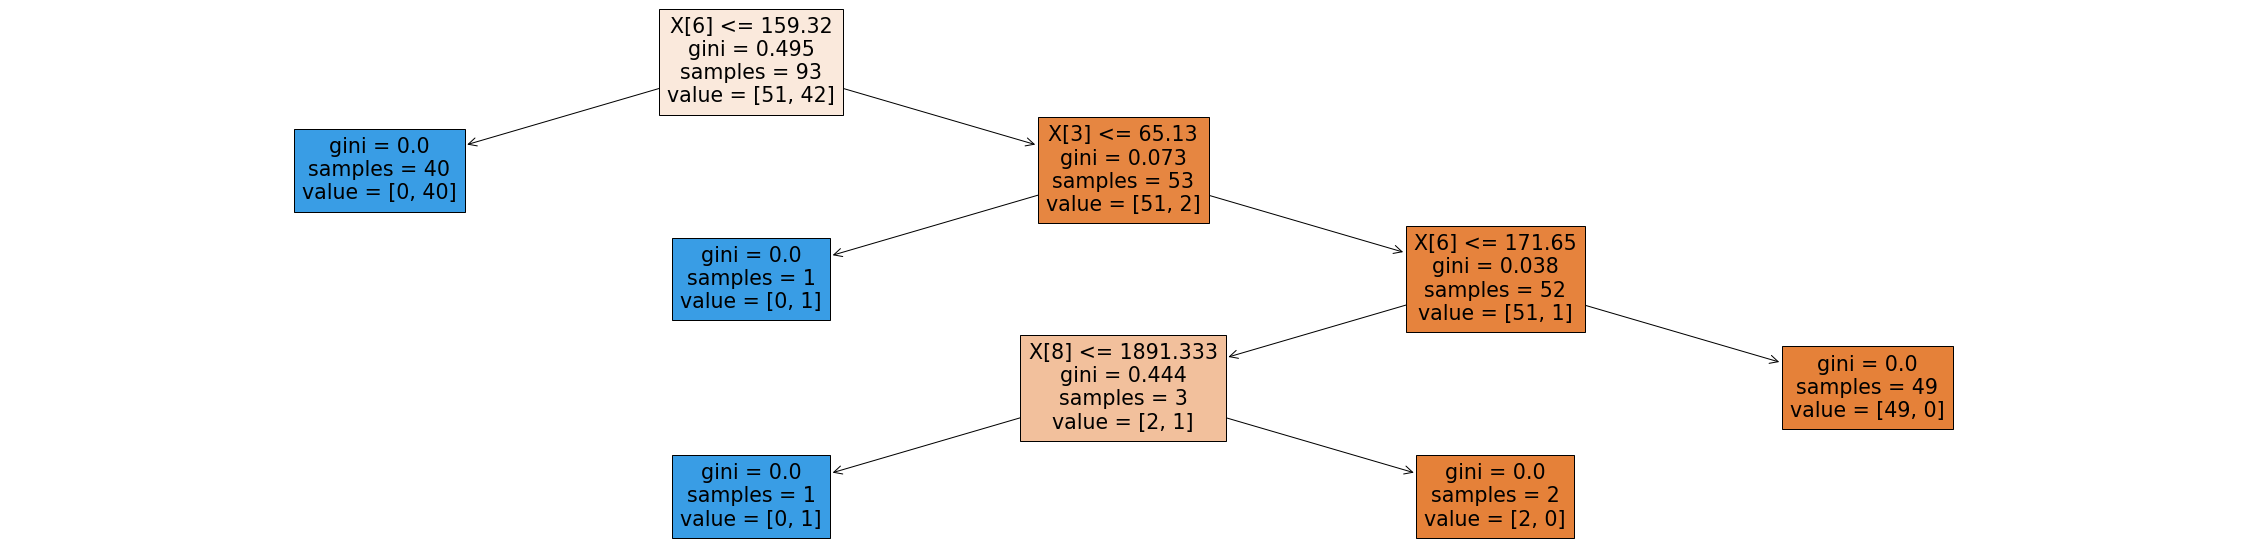

In [11]:
model_all_params = clf
plt.figure(figsize = [40,10])
plot_tree(model_all_params,
         filled=True)
plt.show()

In [12]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9354838709677419

In [13]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5082045083405529, 'steel_price_index'),
 (0.2314000031079936, 'interest_rate'),
 (0.055103095240647944, 'under_construction'),
 (0.052913727396005666, 'units_authorized_started'),
 (0.04235874474881158, 'house_supply'),
 (0.04185680703838792, 'units_completed'),
 (0.03903299552065498, 'lumber_price_index'),
 (0.01943123112498875, 'new_housing_permits'),
 (0.009698887481956861, 'homeownership_rate')]

In [14]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

steel_price_index           0.508205
interest_rate               0.231400
under_construction          0.055103
units_authorized_started    0.052914
house_supply                0.042359
units_completed             0.041857
lumber_price_index          0.039033
new_housing_permits         0.019431
homeownership_rate          0.009699
dtype: float64

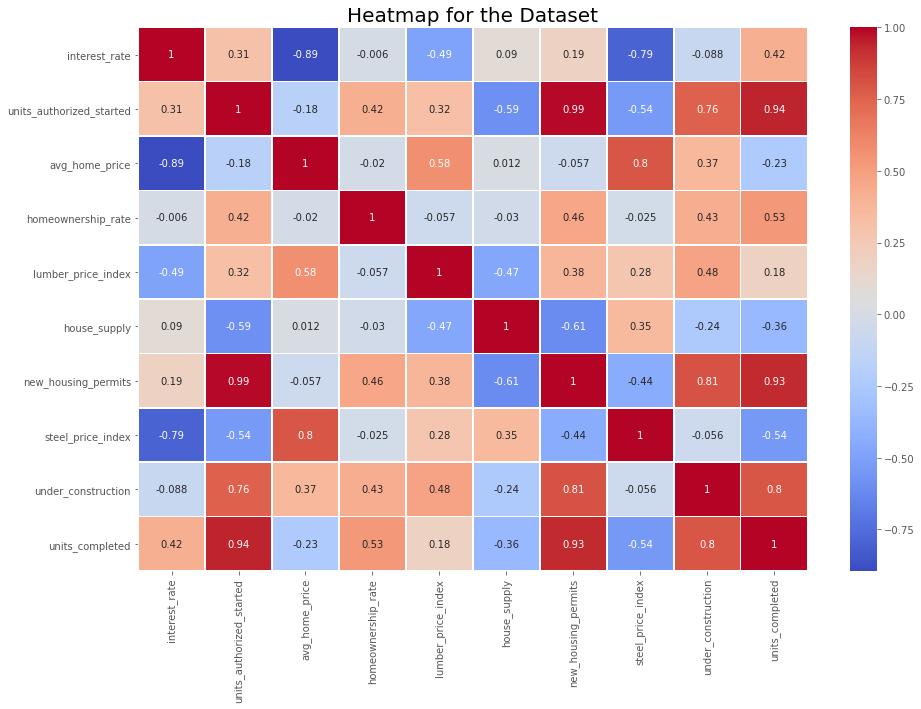

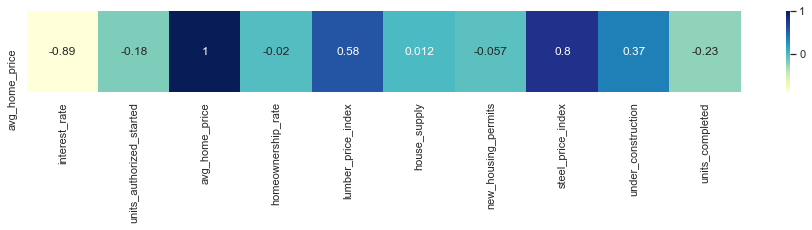

In [15]:
# making a heat map across all variables
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
sns.heatmap(housing_data_subset.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# Correlation with only target variables -- in this case its the AVG PRICE
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(housing_data_subset.corr()).avg_home_price).T,annot=True, cmap='YlGnBu')
plt.show()

